# Project Assignment

## Group members:
- Inês Tacanho: s232669  
- Raquel Marques: s243636
- Sree Keerthi Desu: s243933  

________

### Importing the necessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt

________

__________

## Loading data

In [2]:
ufo_df = pd.read_csv('data/ufo_sighting_data.csv')
military_bases_df = pd.read_csv('data/military-bases.csv', sep=';')
presidents_df = pd.read_csv('data/us_presidents.csv')

/var/folders/42/jzdlm0tx6bld5l7c53yw5zjc0000gn/T/ipykernel_76304/3087351642.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_df = pd.read_csv('data/ufo_sighting_data.csv')


In [3]:
ufo_df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
military_bases_df.head()

,Geo Point,Geo Shape,OBJECTID_1,OBJECTID,COMPONENT,Site Name,Joint Base,State Terr,COUNTRY,Oper Stat,PERIMETER,AREA,Shape_Leng,Shape_Area
0,"31.2309993833, -85.6506347178","{""coordinates"": [[[-85.65462565497243, 31.2341...",26,65,Army Active,Allen Stagefield AL,NaN,Alabama,United States,Active,1.641383,0.176575,3170.633316,6.274240e+05
1,"31.8157331822, -85.6497984957","{""coordinates"": [[[-85.65268851262239, 31.8128...",33,73,Army Active,Louisville Stagefield AL,NaN,Alabama,United States,Active,1.723380,0.162357,3357.487241,5.840968e+05
2,"33.1594636742, -106.425696182","{""coordinates"": [[[-106.27973443186896, 33.910...",66,261,Army Active,White Sands Missile Range NM,NaN,New Mexico,United States,Active,332.133189,3548.570164,648984.100372,1.315079e+10
3,"37.0130203962, -76.3043760544","{""coordinates"": [[[[-76.29312038151345, 37.032...",114,899,Army Active,Fort Monroe,NaN,Virginia,United States,Inactive,10.209688,0.877233,21033.880109,3.570033e+06
4,"21.3866284869, -157.905641308","{""coordinates"": [[[-157.8989279212737, 21.3927...",161,1237,MC Active,MCB Camp Smith,NaN,Hawaii,United States,Active,2.931885,0.331246,5098.778436,9.944004e+05


In [5]:
presidents_df.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


_________

## Information on datasets

In [6]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date_time                        80332 non-null  object 
 1   city                             80332 non-null  object 
 2   state/province                   74535 non-null  object 
 3   country                          70662 non-null  object 
 4   UFO_shape                        78400 non-null  object 
 5   length_of_encounter_seconds      80332 non-null  object 
 6   described_duration_of_encounter  80332 non-null  object 
 7   description                      80317 non-null  object 
 8   date_documented                  80332 non-null  object 
 9   latitude                         80332 non-null  object 
 10  longitude                        80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [7]:
military_bases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geo Point   776 non-null    object 
 1   Geo Shape   776 non-null    object 
 2   OBJECTID_1  776 non-null    int64  
 3   OBJECTID    776 non-null    int64  
 4   COMPONENT   776 non-null    object 
 5   Site Name   776 non-null    object 
 6   Joint Base  66 non-null     object 
 7   State Terr  776 non-null    object 
 8   COUNTRY     776 non-null    object 
 9   Oper Stat   776 non-null    object 
 10  PERIMETER   776 non-null    float64
 11  AREA        776 non-null    float64
 12  Shape_Leng  776 non-null    float64
 13  Shape_Area  776 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 85.0+ KB


In [8]:
presidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  46 non-null     int64 
 1   S.No.       46 non-null     int64 
 2   start       46 non-null     object
 3   end         46 non-null     object
 4   president   46 non-null     object
 5   prior       45 non-null     object
 6   party       46 non-null     object
 7   vice        46 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.0+ KB


In [9]:
# Ensure 'length_of_encounter_seconds' is numeric
ufo_df['length_of_encounter_seconds'] = pd.to_numeric(ufo_df['length_of_encounter_seconds'], errors='coerce')

print(len(ufo_df))
print("Max date: ", ufo_df['Date_time'].max())
print("Min date: ", ufo_df['Date_time'].min())
print("Sight percentage per country: ", ufo_df['country'].value_counts(normalize=True).head(10))
print("Mean length of encounter (hours): ", ufo_df['length_of_encounter_seconds'].mean()/60/60)

80332
Max date:  9/9/2013 23:00
Min date:  1/1/1910 24:00
Sight percentage per country:  us    0.921485
ca    0.042456
gb    0.026959
au    0.007614
de    0.001486
Name: country, dtype: float64
Mean length of encounter (hours):  2.504784898358971


_________

## Plotting data

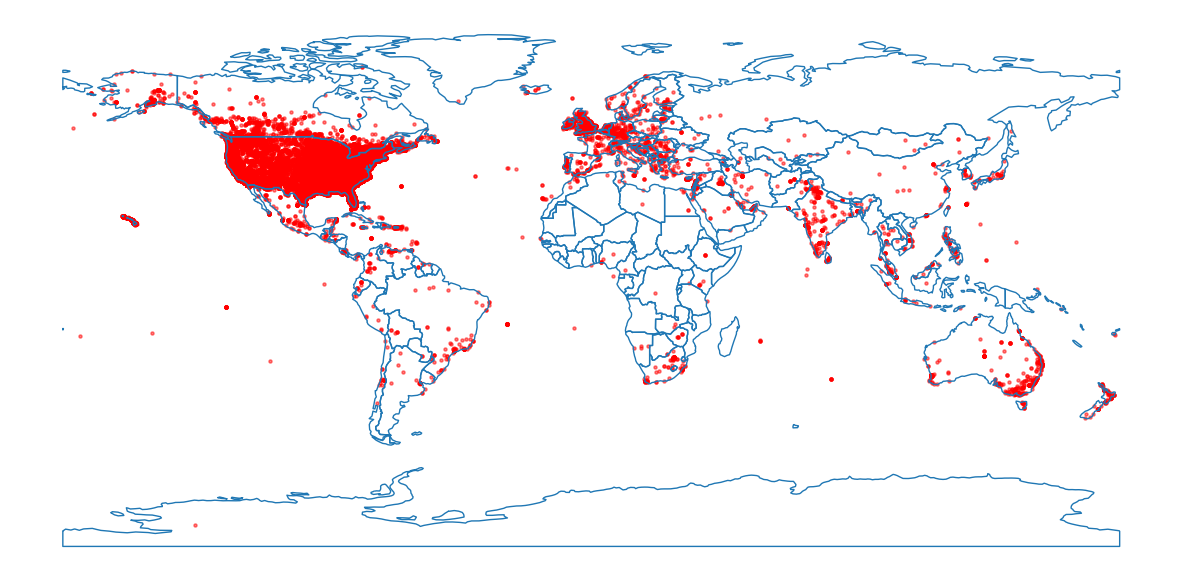

In [10]:
# Plot locations of sightings from latitude and longitude columns
ufo_df['latitude'] = pd.to_numeric(ufo_df['latitude'], errors='coerce')
ufo_df['longitude'] = pd.to_numeric(ufo_df['longitude'], errors='coerce')

dataset = ufo_df.dropna(subset=['latitude', 'longitude'])

# Create a GeoDataFrame from the dataset
gdf = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(dataset['longitude'], dataset['latitude']))
gdf.crs = "EPSG:4326"  # Set the coordinate reference system to WGS84

# Create a world map
world = gpd.read_file('data/plot_countries/ne_110m_admin_0_countries.shp')
world = world.to_crs(gdf.crs)

# Plot the world map and the UFO sightings
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)
#plt.title('UFO Sightings Around the World')
ax.set_axis_off()
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.show()

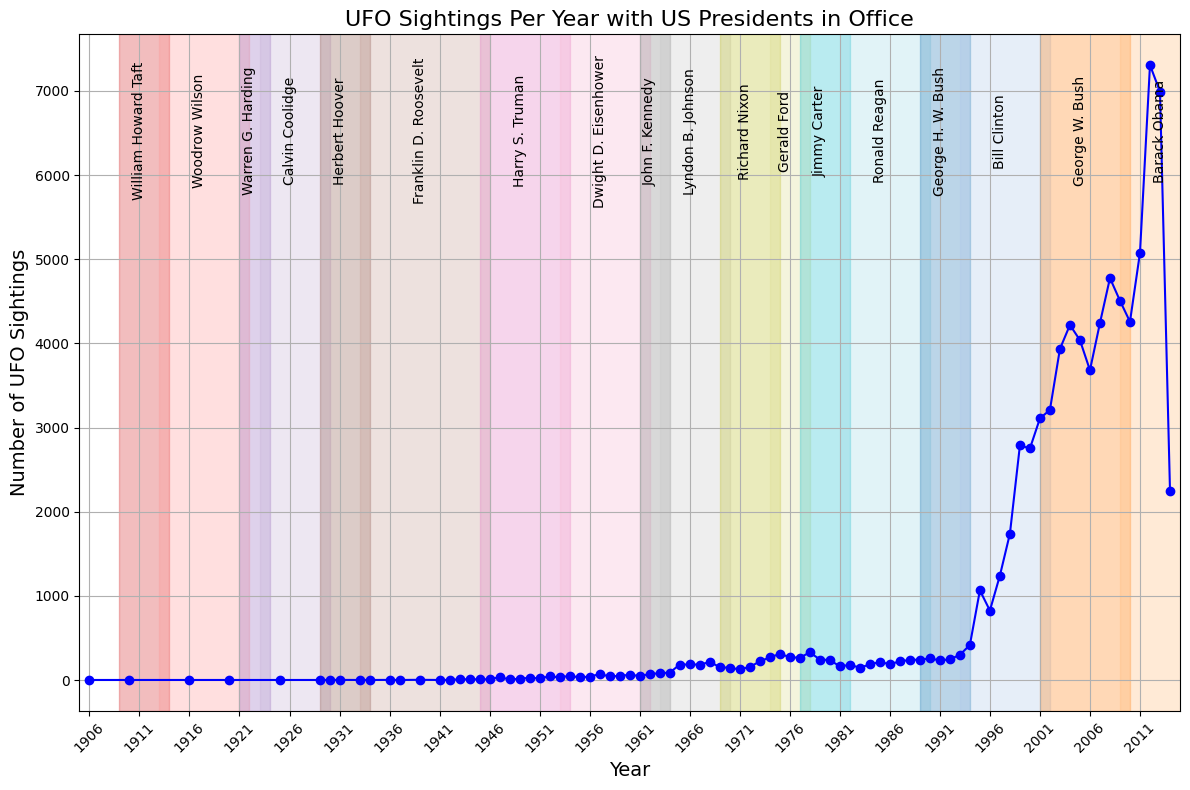

In [13]:
# Extract year from 'Date_time' column
ufo_df['year'] = pd.to_datetime(ufo_df['Date_time']).dt.year

# Count the number of UFO sightings per year
ufo_sightings_per_year = ufo_df.groupby('year').size()

# Convert 'start' and 'end' to datetime
presidents_df['start'] = pd.to_datetime(presidents_df['start'])
presidents_df['end'] = pd.to_datetime(presidents_df['end'])

# Prepare for the plot
plt.figure(figsize=(12, 8))  # Increase the figure size for better clarity
plt.plot(ufo_sightings_per_year.index, ufo_sightings_per_year.values, marker='o', linestyle='-', color='b', label='UFO Sightings')

# Set x-axis start to min year in UFO data and a bit of margin at the end
min_year = int(ufo_sightings_per_year.index.min())
max_year = int(ufo_sightings_per_year.index.max())
plt.xlim(min_year - 1, max_year + 1)  # Add margin to avoid cropping

# Use a colormap to create a set of unique colors for each president's term
colors = plt.cm.tab20.colors  # 'tab20' colormap gives distinct colors

# Add shaded background for each president's term and their name
for i, row in enumerate(presidents_df.itertuples()):
    start_year = row.start.year
    end_year = row.end.year
    # Only add shaded areas for terms within the UFO sightings range
    if start_year >= min_year and start_year <= max_year:
        # Create a shaded region for the president's term with a unique color
        plt.axvspan(start_year, end_year + 1, color=colors[i % len(colors)], alpha=0.3, label=row.president if i == 0 else None)
        # Add the president's name in the center of the shaded region
        mid_point = (start_year + end_year) / 2
        plt.text(mid_point, plt.ylim()[1] * 0.85, row.president, ha='center', va='center', rotation=90, fontsize=10, color='black')

# Customize plot
plt.title('UFO Sightings Per Year with US Presidents in Office', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of UFO Sightings', fontsize=14)
plt.grid(True)

# Set x-axis ticks to appear every 5 years
years_range = range(min_year, max_year + 1, 5)  # Create a range of years with a step of 5
plt.xticks(years_range, rotation=45)
plt.tight_layout()

# Show plot
plt.show()